In [6]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
file_path = '/content/gdrive/MyDrive/fraudTrain.csv'
file_path1 = '//content/gdrive/MyDrive/fraudTest.csv'

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [9]:
df_train = pd.read_csv(file_path)
df_test = pd.read_csv(file_path1)

In [10]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

### Data Cleaning and Preparation

Converting 'trans_date_trans_time' column to date_time type and creating one new column with transaction date

In [12]:

df_train['trans_date_trans_time']= pd.to_datetime(df_train['trans_date_trans_time'])
df_train['trans_date'] =pd.to_datetime(df_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d'))

df_test['trans_date_trans_time']= pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_date']=pd.to_datetime((df_test['trans_date_trans_time']).dt.strftime('%Y-%m-%d'))

Converting 'dob' column into date time format

In [13]:
df_train['dob'] = pd.to_datetime(df_train['dob'])
df_test['dob']= pd.to_datetime(df_test['dob'])

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

Dropping Irrelevant columns which might not be significant for our Analysis


Columns which we are dropping :
1. Unnamed:0
2. cc_num
3. first
4. last
5. street
6. zip
7.  trans_num
8.  unix_time

In [15]:
drop_cols = ['Unnamed: 0','cc_num','first','last','street','zip','trans_num','unix_time']

In [16]:
train_set = df_train.drop(drop_cols,axis=1)
test_set = df_test.drop(drop_cols,axis=1)

In [17]:
train_set.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01


In [18]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   merchant               1296675 non-null  object        
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   gender                 1296675 non-null  object        
 5   city                   1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   lat                    1296675 non-null  float64       
 8   long                   1296675 non-null  float64       
 9   city_pop               1296675 non-null  int64         
 10  job                    1296675 non-null  object        
 11  dob                    1296675 non-null  datetime64[ns]
 12  merch_lat              12966

### Exploratory Data Analysis

In [19]:
## Checking Imbalance of dataset

classes_train = train_set['is_fraud'].value_counts()
normal_share_train= classes_train[0]/train_set['is_fraud'].count()*100
fraud_share_train= classes_train[1]/train_set['is_fraud'].count()*100

In [20]:
print(normal_share_train)
print(fraud_share_train)
print(classes_train)

99.42113482561166
0.5788651743883394
is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [21]:
classes_test = test_set['is_fraud'].value_counts()
normal_share_test= classes_test[0]/test_set['is_fraud'].count()*100
fraud_share_test= classes_test[1]/test_set['is_fraud'].count()*100

In [22]:
print(normal_share_test)
print(fraud_share_test)
print(classes_test)

99.61401355721146
0.3859864427885316
is_fraud
0    553574
1      2145
Name: count, dtype: int64


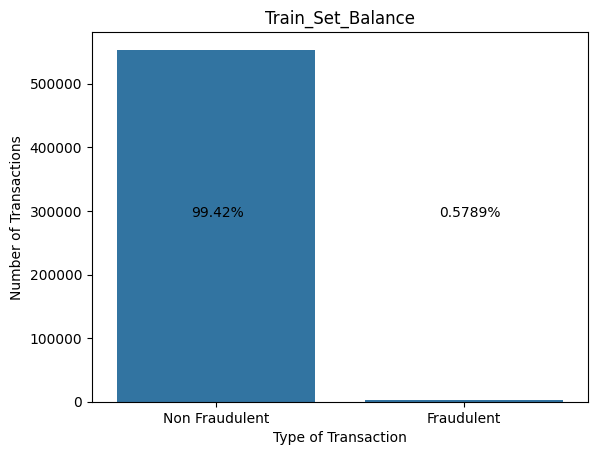

In [23]:
## Plotting Number of Transaction and Percentage of Transaction for Train set
sns.barplot(x=['Non Fraudulent','Fraudulent'],y=classes_test)
plt.title('Train_Set_Balance')
plt.xlabel('Type of Transaction')
plt.ylabel('Number of Transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')
plt.show()

In [24]:
train_set.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01


In [25]:
## Deriving Age of the individual when transaction is done

train_set['age'] = train_set['trans_date']- train_set['dob']
train_set['age'] = round(train_set['age'].dt.total_seconds() / (365.25 * 24 * 60 * 60))


test_set['age'] = test_set['trans_date']- test_set['dob']
test_set['age'] = round(test_set['age'].dt.total_seconds() / (365.25 * 24 * 60 * 60))

In [26]:
### Creating Function for Calculating Distance between card holder location and merchant location
### As latitude and longitudes and mentioned in degrees we will first convert it to radians
def calculate_distance(row):
    # Convert degrees to radians
    customer_lat_rad = np.radians(row['lat'])
    customer_long_rad = np.radians(row['long'])
    merc_lat_rad = np.radians(row['merch_lat'])
    merc_long_rad = np.radians(row['merch_long'])

    # Earth's radius (mean radius in kilometers)
    R = 6371

    # Calculate Euclidean distance considering spherical coordinates
    distance = R * np.sqrt(
        (customer_lat_rad - merc_lat_rad) ** 2 +
        (customer_long_rad - merc_long_rad) ** 2
    )
    distance = round(distance,2)
    return distance

In [27]:
train_set['distance'] = train_set.apply(calculate_distance, axis=1)

In [28]:
test_set['distance'] = test_set.apply(calculate_distance,axis=1)

In [29]:
### Deriving Month of the Transaction from Transaction Date column
train_set['trans_month'] = train_set['trans_date'].dt.month
test_set['trans_month'] = test_set['trans_date'].dt.month

In [30]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   merchant               1296675 non-null  object        
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   gender                 1296675 non-null  object        
 5   city                   1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   lat                    1296675 non-null  float64       
 8   long                   1296675 non-null  float64       
 9   city_pop               1296675 non-null  int64         
 10  job                    1296675 non-null  object        
 11  dob                    1296675 non-null  datetime64[ns]
 12  merch_lat              12966

In [31]:
train_set.describe(percentiles=[0.25,0.50,0.75,0.90,0.99])

,trans_date_trans_time,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_date,age,distance,trans_month
count,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06
mean,2019-10-03 12:47:28.070214144,7.035104e+01,3.853762e+01,-9.022634e+01,8.882444e+04,1973-10-03 19:02:55.017178512,3.853734e+01,-9.022646e+01,5.788652e-03,2019-10-02 23:29:11.362831872,4.599746e+01,8.513763e+01,6.142150e+00
min,2019-01-01 00:00:18,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1924-10-30 00:00:00,1.902779e+01,-1.666712e+02,0.000000e+00,2019-01-01 00:00:00,1.400000e+01,3.000000e-02,1.000000e+00
25%,2019-06-03 19:12:22.500000,9.650000e+00,3.462050e+01,-9.679800e+01,7.430000e+02,1962-08-13 00:00:00,3.473357e+01,-9.689728e+01,0.000000e+00,2019-06-03 00:00:00,3.300000e+01,6.282000e+01,3.000000e+00
50%,2019-10-03 07:35:47,4.752000e+01,3.935430e+01,-8.747690e+01,2.456000e+03,1975-11-30 00:00:00,3.936568e+01,-8.743839e+01,0.000000e+00,2019-10-03 00:00:00,4.400000e+01,8.877000e+01,6.000000e+00
75%,2020-01-28 15:02:55.500000,8.314000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,1987-02-22 00:00:00,4.195716e+01,-8.023680e+01,0.000000e+00,2020-01-28 00:00:00,5.700000e+01,1.087000e+02,9.000000e+00
90%,2020-05-02 11:09:19.800000,1.366700e+02,4.444770e+01,-7.497810e+01,1.861400e+05,1994-03-13 00:00:00,4.449305e+01,-7.493290e+01,0.000000e+00,2020-05-02 00:00:00,7.100000e+01,1.240200e+02,1.200000e+01
99%,2020-06-16 06:16:26.040000,5.459926e+02,4.847860e+01,-7.034570e+01,1.577385e+06,2003-05-07 00:00:00,4.857791e+01,-7.038504e+01,0.000000e+00,2020-06-16 00:00:00,9.100000e+01,1.463200e+02,1.200000e+01
max,2020-06-21 12:13:37,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2005-01-29 00:00:00,6.751027e+01,-6.695090e+01,1.000000e+00,2020-06-21 00:00:00,9.600000e+01,1.571600e+02,1.200000e+01
std,NaN,1.603160e+02,5.075808e+00,1.375908e+01,3.019564e+05,NaN,5.109788e+00,1.377109e+01,7.586269e-02,NaN,1.739607e+01,3.166258e+01,3.417703e+00


In [32]:
numerical_cols = train_set.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = train_set.select_dtypes(include=['object']).columns.tolist()

In [33]:
numerical_cols

['amt',
 'lat',
 'long',
 'city_pop',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'age',
 'distance']

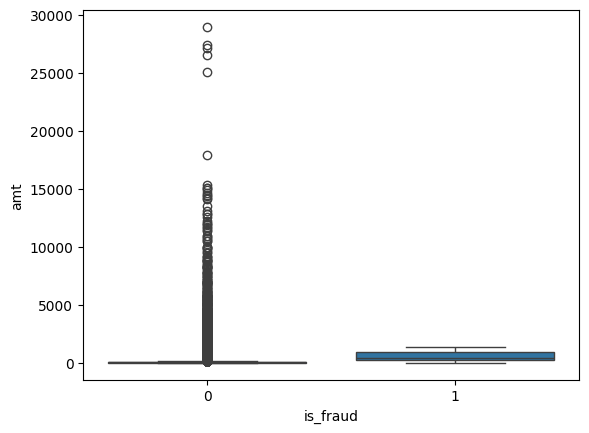

In [34]:
sns.boxplot(x=train_set.is_fraud,y=train_set.amt)
plt.show()

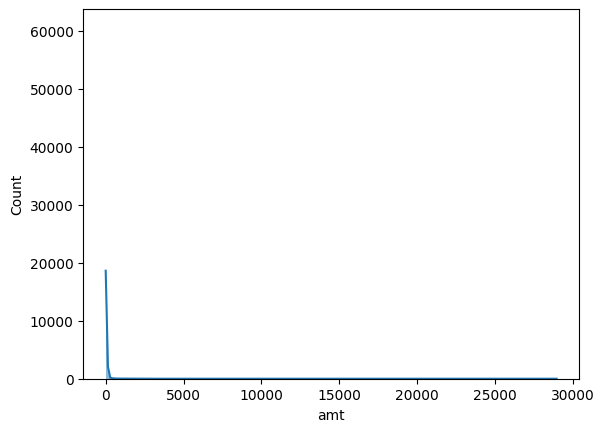

In [35]:
sns.histplot(x=train_set.amt,kde=True)
plt.show()

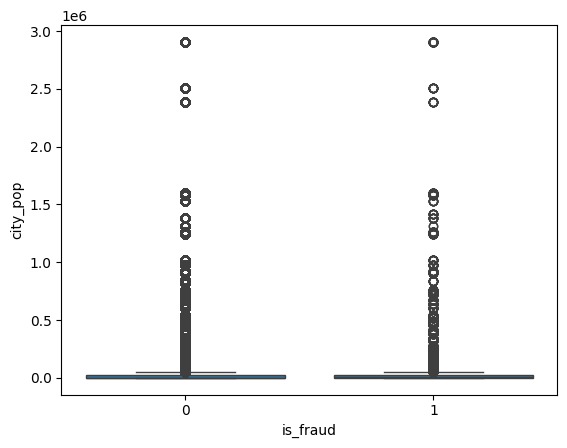

In [36]:
sns.boxplot(x=train_set.is_fraud,y=train_set.city_pop)
plt.show()

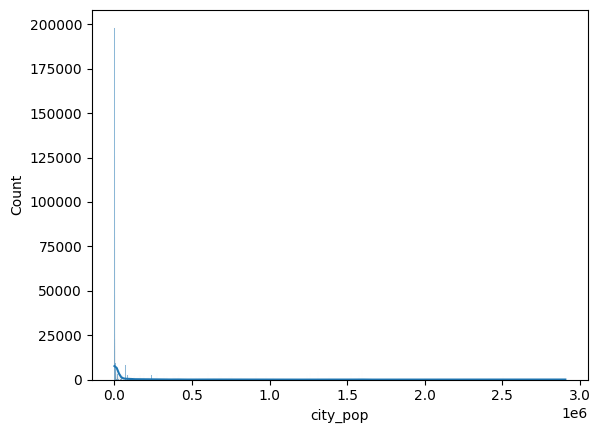

In [37]:
sns.histplot(x=train_set.city_pop,kde=True)
plt.show()

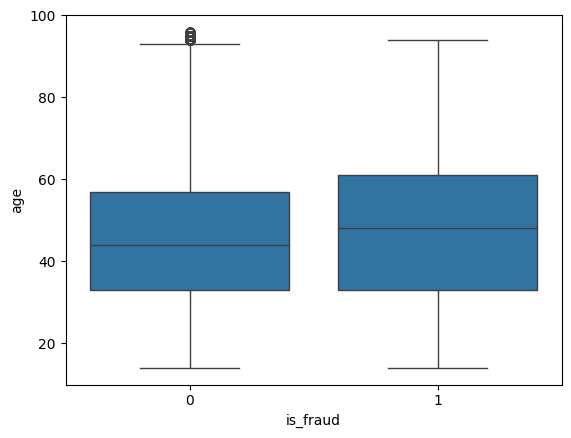

In [38]:
sns.boxplot(x=train_set.is_fraud,y=train_set.age)
plt.show()

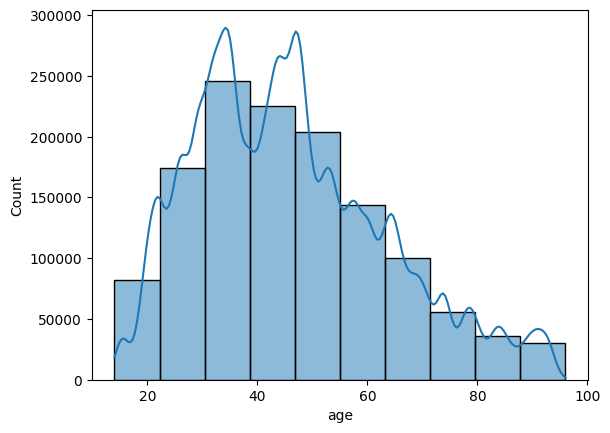

In [39]:
sns.histplot(x=train_set.age,bins=10,kde=True)
plt.show()

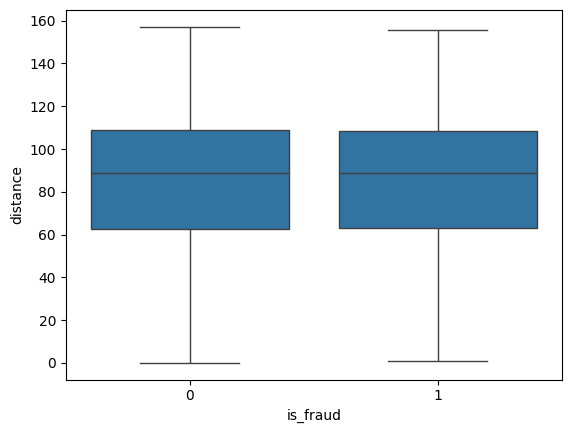

In [40]:
sns.boxplot(x=train_set.is_fraud,y=train_set.distance)
plt.show()

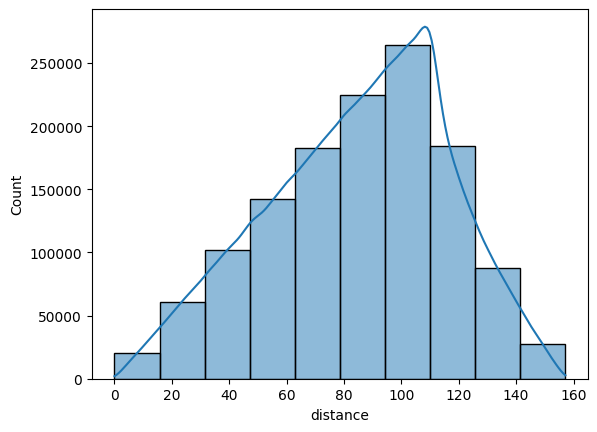

In [41]:
sns.histplot(x=train_set.distance,bins=10,kde=True)
plt.show()

In [42]:
categorical_cols

['merchant', 'category', 'gender', 'city', 'state', 'job']

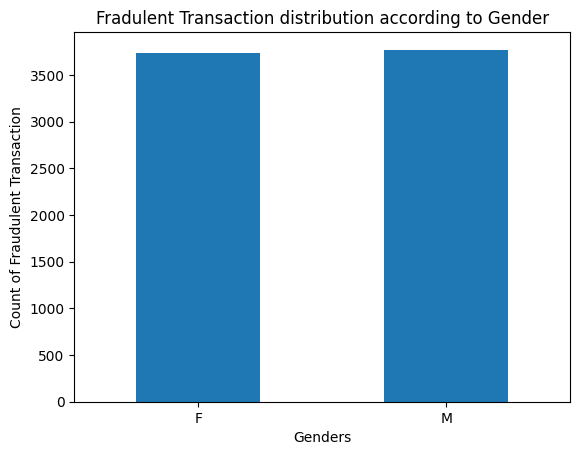

In [43]:
train_set.groupby(['gender'])['is_fraud'].sum().sort_values().plot.bar()
plt.title('Fradulent Transaction distribution according to Gender')
plt.xlabel('Genders')
plt.xticks(rotation=0)
plt.ylabel('Count of Fraudulent Transaction')
plt.show()

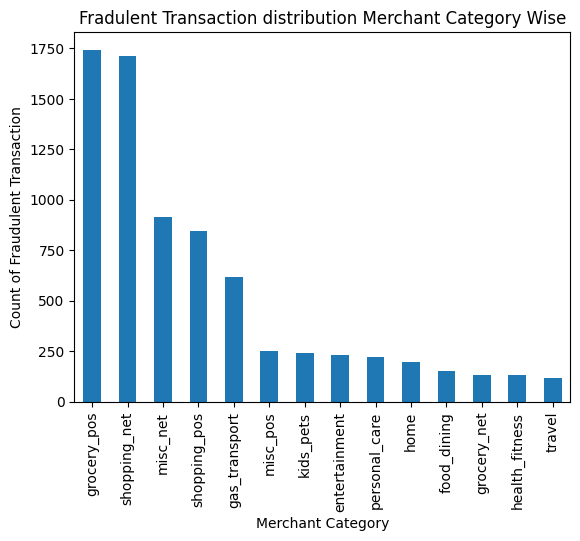

In [44]:
train_set.groupby(['category'])['is_fraud'].sum().sort_values(ascending=False).plot.bar()
plt.title('Fradulent Transaction distribution Merchant Category Wise')
plt.xlabel('Merchant Category')
plt.ylabel('Count of Fraudulent Transaction')
plt.show()

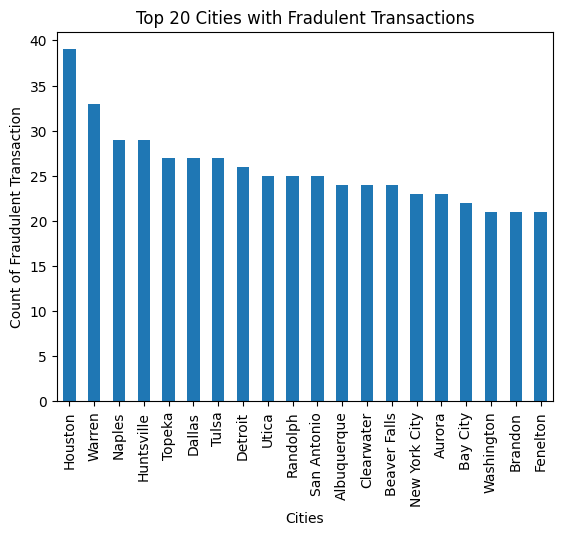

In [45]:
train_set.groupby(['city'])['is_fraud'].sum().sort_values(ascending=False)[:20].plot.bar()
plt.title('Top 20 Cities with Fradulent Transactions')
plt.xlabel('Cities')
plt.ylabel('Count of Fraudulent Transaction')
plt.show()

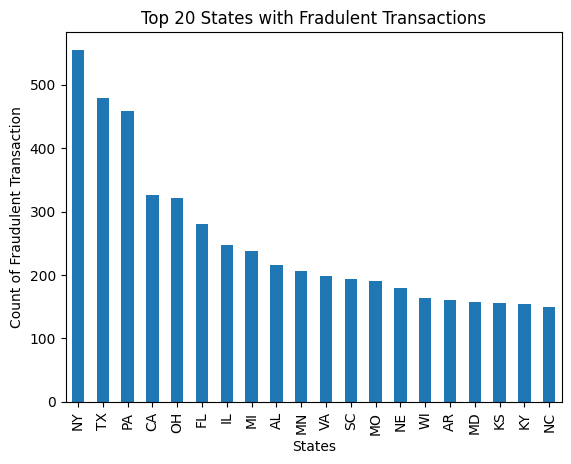

In [46]:
train_set.groupby(['state'])['is_fraud'].sum().sort_values(ascending=False)[:20].plot.bar()
plt.title('Top 20 States with Fradulent Transactions')
plt.xlabel('States')
plt.ylabel('Count of Fraudulent Transaction')
plt.show()

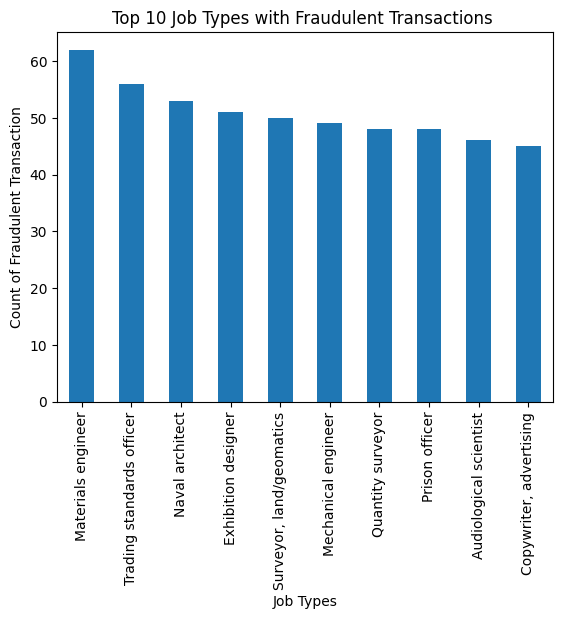

In [113]:
train_set.groupby(['job'])['is_fraud'].sum().sort_values(ascending=False)[:10].plot.bar()
plt.title('Top 10 Job Types with Fraudulent Transactions ')
plt.xlabel('Job Types')
plt.ylabel('Count of Fraudulent Transaction')
plt.show()

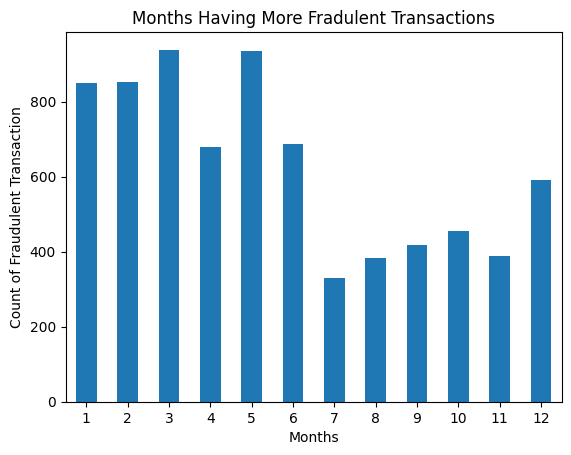

In [48]:
train_set.groupby(['trans_month'])['is_fraud'].sum().plot.bar()
plt.title('Months Having More Fradulent Transactions')
plt.xlabel('Months')
plt.xticks(rotation=0)
plt.ylabel('Count of Fraudulent Transaction')
plt.show()

### Preparing Data For Model Building

In [49]:
train_set.nunique()

,0
trans_date_trans_time,1274791
merchant,693
category,14
amt,52928
gender,2
city,894
state,51
lat,968
long,969
city_pop,879


In [50]:
drop_cols2 = ['trans_date_trans_time','merchant','city','state','lat','long','job','dob','merch_lat','merch_long','trans_date']

In [51]:
train_data = train_set.drop(drop_cols2,axis=1)
test_data = test_set.drop(drop_cols2,axis=1)

In [52]:
## Mapping on Gender Column

train_data['gender'] = train_data['gender'].map({'M':1,'F':0})
test_data['gender'] = test_data['gender'].map({'M':1,'F':0})

In [53]:
### Creating Dummy Variables for Category column

train_data_final = pd.get_dummies(train_data,columns=['category'],drop_first=True,dtype=int)
test_data_final = pd.get_dummies(test_data,columns=['category'],drop_first=True,dtype=int)

##### MODEL BUILDING

In [54]:
### Train Test Split

X_train = train_data_final.drop(['is_fraud'],axis=1)
y_train = train_data_final['is_fraud']

X_test = test_data_final.drop(['is_fraud'],axis=1)
y_test = test_data_final['is_fraud']

In [55]:
## Handling Skewness in Data

pt = PowerTransformer(copy=False)
X_train = pt.fit_transform(X_train)
X_test= pt.transform(X_test)

### Model-1 : Logistic Regression without Oversampling

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model1 = LogisticRegression()

In [59]:
y_train_pred = model1.predict(X_train)

In [60]:
print("Logistic Regression Train Set Report")
print("-----------------------------------")
print(classification_report(y_train,y_train_pred))

Logistic Regression Train Set Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.01      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675



In [61]:
print('ROC score of Train set:',roc_auc_score(y_train_pred,y_train))

ROC score of Train set: 0.5039101683508491


### MODEL-2 : Decision Trees

In [62]:
from sklearn import tree

In [63]:
model2= tree.DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=100,min_samples_split=200,random_state=42)

In [64]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=100,
                       min_samples_split=200, random_state=42)

In [65]:
y_train_pred = model2.predict(X_train)

In [66]:
print("Decision Trees-- Train Set Report")
print("-----------------------------------")
print(classification_report(y_train,y_train_pred))
print('ROC score of Train set:',roc_auc_score(y_train_pred,y_train))

Decision Trees-- Train Set Report
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.80      0.68      0.74      7506

    accuracy                           1.00   1296675
   macro avg       0.90      0.84      0.87   1296675
weighted avg       1.00      1.00      1.00   1296675

ROC score of Train set: 0.8995647396951951


#### MODEL-3 : RANDOM FORESTS

In [67]:
model3 = RandomForestClassifier(criterion='entropy',max_depth= 10, min_samples_split=100, min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=40)

In [68]:
model3.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=30,
                       min_samples_split=100, n_jobs=-1, random_state=40,
                       warm_start=True)

In [69]:
y_train_pred = model3.predict(X_train)

In [70]:
print("Random Forrest-- Train Set Report")
print("-----------------------------------")
print(classification_report(y_train,y_train_pred))
print('ROC score of Train set:',roc_auc_score(y_train_pred,y_train))

Random Forrest-- Train Set Report
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.91      0.51      0.65      7506

    accuracy                           1.00   1296675
   macro avg       0.95      0.75      0.82   1296675
weighted avg       1.00      1.00      1.00   1296675

ROC score of Train set: 0.9523404316252693


In [71]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Define and train the XGBClassifier
model_xgb = xgb.XGBClassifier(criterion='entropy', max_depth=10, min_child_weight=100, subsample=0.8, random_state=42)
model_xgb.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_xgb = model_xgb.predict(X_train)

# Print the classification report
print("XGBoost -- Train Set Report")
print("-----------------------------------")
print(classification_report(y_train, y_train_pred_xgb))

# Calculate the ROC AUC score
roc_score = roc_auc_score(y_train, model_xgb.predict_proba(X_train)[:, 1])
print('ROC score of Train set:', roc_score)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:19:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost -- Train Set Report
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.85      0.63      0.72      7506

    accuracy                           1.00   1296675
   macro avg       0.92      0.82      0.86   1296675
weighted avg       1.00      1.00      1.00   1296675

ROC score of Train set: 0.9942774094855157


In [72]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with random_state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to resample the data
X_res, y_res = smote.fit_resample(X_train, y_train)

# Print the count of each class after oversampling
print(y_res.value_counts())


is_fraud
0    1289169
1    1289169
Name: count, dtype: int64


In [73]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Define and train the XGBClassifier
model_xgb = xgb.XGBClassifier(criterion='entropy', max_depth=10, min_child_weight=100, subsample=0.8, random_state=42)
model_xgb.fit(X_res,y_res)

# Make predictions on the training set
y_train_pred_xgb = model_xgb.predict(X_train)

# Print the classification report
print("XGBoost -- Train Set Report")
print("-----------------------------------")
print(classification_report(y_train, y_train_pred_xgb))

# Calculate the ROC AUC score
roc_score = roc_auc_score(y_train, model_xgb.predict_proba(X_train)[:, 1])
print('ROC score of Train set:', roc_score)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:19:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost -- Train Set Report
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1289169
           1       0.47      0.95      0.63      7506

    accuracy                           0.99   1296675
   macro avg       0.74      0.97      0.81   1296675
weighted avg       1.00      0.99      0.99   1296675

ROC score of Train set: 0.9986004494412722


##### Without Oversampling Random Forrest Model is giving Good AUC-ROC score  Train Set
##### SAMPLING DATA USING ADASYN

In [74]:
X_train_res,y_train_res = ADASYN().fit_resample(X_train,y_train)

In [75]:
X_train_res.shape

(2578521, 19)

In [76]:
y_train_res.shape

(2578521,)

### MODEL-4 : Random Forrest Model with ADASYN oversampling

In [77]:
model4 = RandomForestClassifier(criterion='entropy',max_depth= 10, min_samples_split=100, min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=40,oob_score=True)

In [78]:
model4.fit(X_train_res,y_train_res)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=30,
                       min_samples_split=100, n_jobs=-1, oob_score=True,
                       random_state=40, warm_start=True)

In [79]:
y_train_pred = model4.predict(X_train_res)

In [80]:
print("Random Forrest-- Train Set Report")
print("-----------------------------------")
#print(classification_report(y_train,y_train_pred))
print('ROC score of Train set:',roc_auc_score(y_train_res,y_train_pred))

Random Forrest-- Train Set Report
-----------------------------------
ROC score of Train set: 0.9454394150526372


In [81]:
model4.oob_score_

0.9433493076069577

In [82]:
print('ROC score of Train set:',roc_auc_score(y_train_res,y_train_pred))
print('Recall Score:',recall_score(y_train_pred,y_train_res))
print('Confusion Matrix')
print('----------------')
print(confusion_matrix(y_train_res,y_train_pred))
print("Random Forrest-- Train Set Report")
print("-----------------------------------")
print(classification_report(y_train_res,y_train_pred))

ROC score of Train set: 0.9454394150526372
Recall Score: 0.9473332897163651
Confusion Matrix
----------------
[[1221550   67619]
 [  73067 1216285]]
Random Forrest-- Train Set Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.95   1289169
           1       0.95      0.94      0.95   1289352

    accuracy                           0.95   2578521
   macro avg       0.95      0.95      0.95   2578521
weighted avg       0.95      0.95      0.95   2578521



Prediction on Test Set

In [83]:
y_test_pred = model_xgb.predict(X_test)

In [84]:
print('ROC score of Test set:',roc_auc_score(y_test,y_test_pred))
print('Confusion Matrix')
print('----------------')
print(confusion_matrix(y_test,y_test_pred))
print('Recall Score:',recall_score(y_test,y_test_pred))
print("Random Forrest-- Test Set Report")
print("-----------------------------------")
print(classification_report(y_test,y_test_pred))

ROC score of Test set: 0.9089669550836442
Confusion Matrix
----------------
[[550856   2718]
 [   380   1765]]
Recall Score: 0.8228438228438228
Random Forrest-- Test Set Report
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.39      0.82      0.53      2145

    accuracy                           0.99    555719
   macro avg       0.70      0.91      0.76    555719
weighted avg       1.00      0.99      1.00    555719



Train Set:
The oversampling seems to have effectively addressed class imbalance for the training set:
High Recall and Precision (both 0.95):
Indicates the model is effectively learning patterns to detect fraudulent transactions.
High F1-Score (0.95):
Reflects a balanced performance between precision and recall in the training data.


Test Set:

Class 1 (Fraudulent Transactions):

Recall (0.95): This remains strong, showing the model's ability to detect most fraudulent transactions.
Precision (0.08): Still extremely low, which means many non-fraudulent transactions are being misclassified as fraudulent.
F1-Score (0.15): Indicates a poor balance between precision and recall.
The model's performance for class 1 is inadequate, despite good recall, because the high false-positive rate reduces its practical usability.


Class 0 (Non-Fraudulent Transactions):

Precision (1.00), Recall (0.96): Very high, showing that the model predominantly focuses on the majority class.

In [85]:
model_xgb.feature_importances_

array([0.10134033, 0.00319071, 0.0022356 , 0.00336297, 0.00131063,
       0.00715383, 0.06797124, 0.41920087, 0.14187787, 0.01907993,
       0.01406312, 0.04767581, 0.01646772, 0.01027809, 0.02584716,
       0.01927033, 0.0228974 , 0.01759123, 0.05918522], dtype=float32)

In [86]:
cols_list = train_data_final.columns

In [87]:
imp_df = pd.DataFrame({
    "Varname": cols_list.drop('is_fraud'),
    "Imp": model4.feature_importances_
})

In [88]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,0.740626
5,trans_month,0.031445
16,category_shopping_net,0.024624
6,category_food_dining,0.022684
17,category_shopping_pos,0.022679
3,age,0.022530
9,category_grocery_pos,0.022192
7,category_gas_transport,0.017978
13,category_misc_net,0.016393
11,category_home,0.014630


Testing This Model on Original data without Oversampling

In [89]:
y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)

In [90]:

print("Final Model-- Train Set Report")
print("-----------------------------------")
print('ROC score of Test set:',roc_auc_score(y_train,y_train_pred))
print('Recall Score:',recall_score(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))
print("Final Model--- Test Set Report")
print("-----------------------------------")
print('ROC score of Test set:',roc_auc_score(y_test,y_test_pred))
print('Recall Score:',recall_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

Final Model-- Train Set Report
-----------------------------------
ROC score of Test set: 0.952924204293758
Recall Score: 0.9583000266453504
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1289169
           1       0.10      0.96      0.17      7506

    accuracy                           0.95   1296675
   macro avg       0.55      0.95      0.57   1296675
weighted avg       0.99      0.95      0.97   1296675

Final Model--- Test Set Report
-----------------------------------
ROC score of Test set: 0.9510371017920144
Recall Score: 0.9440559440559441
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.08      0.94      0.15      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.95      0.56    555719
weighted avg       1.00      0.96      0.98    555719



In [91]:
df_train_pred = pd.DataFrame(y_train_pred)

In [92]:
final_train = pd.concat([train_set,df_train_pred],axis=1)

In [93]:
final_train = final_train.rename(columns={ 0 : 'is_fraud_pred'})

In [94]:
final_train.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age,distance,trans_month,is_fraud_pred
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,31.0,97.05,1,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,41.0,30.28,1,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,57.0,108.51,1,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,52.0,102.28,1,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,33.0,96.57,1,0


In [95]:
df_test_pred = pd.DataFrame(y_test_pred)

In [96]:
final_test = pd.concat([test_set,df_test_pred],axis=1)

In [97]:
final_test = final_test.rename(columns={ 0 : 'is_fraud_pred'})

In [98]:
final_test.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age,distance,trans_month,is_fraud_pred
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,2020-06-21,52.0,29.58,6,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,2020-06-21,30.0,110.27,6,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,2020-06-21,50.0,75.94,6,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,2020-06-21,33.0,27.91,6,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,2020-06-21,65.0,124.41,6,0


In [99]:
### Merging both Training and Test Set for Cost Benefit Analysis Now

df_merge_final = pd.concat([final_train, final_test],axis=0)
df_merge_final.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age,distance,trans_month,is_fraud_pred
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,31.0,97.05,1,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,41.0,30.28,1,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,57.0,108.51,1,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,52.0,102.28,1,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,33.0,96.57,1,0


In [100]:
df_merge_final['Year'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).year

In [101]:
df_merge_final.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,...,dob,merch_lat,merch_long,is_fraud,trans_date,age,distance,trans_month,is_fraud_pred,Year
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,...,1988-03-09,36.011293,-82.048315,0,2019-01-01,31.0,97.05,1,0,2019
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,...,1978-06-21,49.159047,-118.186462,0,2019-01-01,41.0,30.28,1,0,2019
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,...,1962-01-19,43.150704,-112.154481,0,2019-01-01,57.0,108.51,1,0,2019
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,...,1967-01-12,47.034331,-112.561071,0,2019-01-01,52.0,102.28,1,0,2019
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,...,1986-03-28,38.674999,-78.632459,0,2019-01-01,33.0,96.57,1,0,2019


In [102]:
df_merge_final.groupby(['Year','trans_month'])['category'].count()

Year  trans_month
2019  1               52525
      2               49866
      3               70939
      4               68078
      5               72532
      6               86064
      7               86596
      8               87359
      9               70652
      10              68758
      11              70421
      12             141060
2020  1               52202
      2               47791
      3               72850
      4               66892
      5               74343
      6               87805
      7               85848
      8               88759
      9               69533
      10              69348
      11              72635
      12             139538
Name: category, dtype: int64

In [103]:
Average_tns_per_month = df_merge_final.category.count()/24

In [104]:
print("Average Number of Transaction Per Month = ",round(Average_tns_per_month))

Average Number of Transaction Per Month =  77183


In [105]:
avg_fraud_per_month = df_merge_final[df_merge_final['is_fraud']==1].category.count()/24

In [106]:
print("Average Number of Fradulent Transactions Per Month = ",round(avg_fraud_per_month))

Average Number of Fradulent Transactions Per Month =  402


In [107]:
avg_amount_per_fraud = df_merge_final[df_merge_final['is_fraud']==1].amt.mean()

In [108]:
print("Average Amount of Fradulent Transactions Per Month = ",round(avg_amount_per_fraud))

Average Amount of Fradulent Transactions Per Month =  531


In [109]:
avg_fraud_detected_model = df_merge_final[df_merge_final['is_fraud_pred']==1].category.count()/24

In [110]:
print("Average Number of Fradulent Transactions as detected by your model = ",round(avg_fraud_detected_model))

Average Number of Fradulent Transactions as detected by your model =  4170


In [111]:
# Average number of transactions per month that are fraudulent but are not detected by the model

Undetected_frauds = df_merge_final.loc[(df_merge_final.is_fraud_pred==0) & (df_merge_final.is_fraud==1)]
print("Number of Transactions that are Fradulent but undetected by model =", round(Undetected_frauds.category.count()/24))

Number of Transactions that are Fradulent but undetected by model = 18
